In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

## Sigmoid function & Logistic Regression Equation

The sigmoid function maps any real-valued number to the range of [0, 1], which makes it suitable for modeling probabilities in binary classification. The sigmoid function is defined as follows:
$$Sigmoid(\pi) = \frac{1}{1+e^{\pi}}$$

---
In the Logistic Regression Equation, $\pi$ is the linear combination of input features and weights plus the bias term that can be expressed by
$$\pi = \beta_0 + \beta_1x_1+\ldots+\beta_kx_k$$

where 
- $\beta_0$ is the intercept
- The coefficients for the features $x_i$ are denoted by $\beta_i$.

So, the Logistic Regression Equation denoted by

$$probability = Sigmoid(\pi) = \frac{1}{1+e^{\pi}}$$

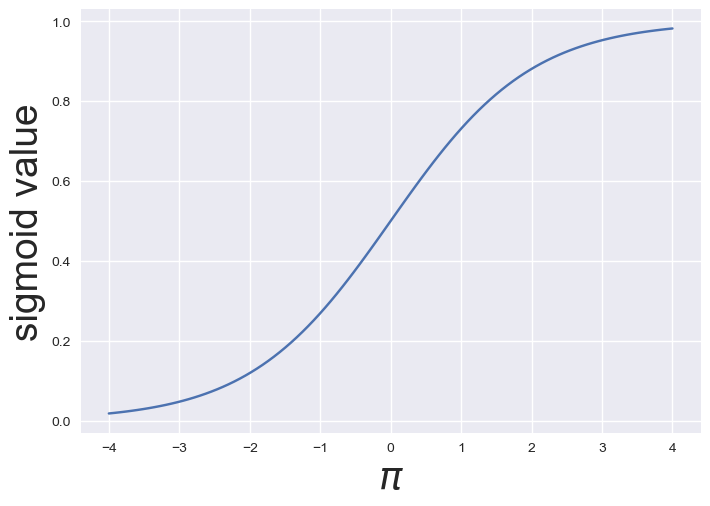

In [2]:
## Simple sigmoid function
sigmoid = lambda pi: 1 / (1+np.exp(-pi))
pi = np.linspace(-4, 4, 100)
plt.plot(pi, sigmoid(pi))
plt.xlabel('$\pi$', fontsize=28)
plt.ylabel("sigmoid value", fontsize=28)
plt.savefig("sigmoid.png");

Consider an illustrative dataset as follows:
$$
\begin{bmatrix}
1 & 1 & 175 & 8\\
1 & 0 & 172 & 6\\
\vdots & \vdots & \vdots & \vdots \\
1 & 0 & 189 & 7\\
\end{bmatrix}
\begin{bmatrix}
\beta_0\\
\beta_1\\
\beta_2\\
\beta_3
\end{bmatrix}
\to
X\beta
$$
This dataset comprises various samples characterized by four features: a constant term, a binary attribute, height, and weight. Corresponding to these features, we have coefficients represented by the vector:
$$\begin{bmatrix}
\beta_0\\
\beta_1\\
\beta_2\\
\beta_3
\end{bmatrix}$$
The goal is to predict a target value, and this matrix-vector multiplication can be described as 
$X\beta$, yielding an array of predictions.

To establish these predictions, we can utilize the sigmoid function to transform the linear combination:
$$y = sigmoid(X\beta)$$

The sigmoid function then converts this linear combination into a probability score $y$ that the sample belongs to class 1. This mechanism enables us to classify samples based on the calculated probabilities.

In [3]:
# Generate synthetic data
np.random.seed(42)
num_samples = 100
num_features = 2
X = np.random.rand(num_samples, num_features)
y = np.random.randint(0, 2, num_samples)

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Initialize weights and bias
beta = np.random.randn(num_features)
b = np.random.randn()

In [4]:
z = np.dot(X, beta) + b
z

array([-2.2038601 , -1.97323897, -0.81493842, -1.80782432, -2.02815715,
       -1.93321102, -1.47308346, -0.878313  , -1.4990712 , -1.25345094,
       -1.17594003, -1.24888343, -2.02213378, -1.39458407, -1.01853317,
       -1.21929811, -1.93901686, -2.48880457, -0.85241831, -1.69268296,
       -1.29997353, -1.85311642, -1.66926826, -1.49829353, -1.18949204,
       -2.44176093, -2.59760348, -2.34931152, -0.81833394, -0.97763888,
       -1.18669677, -1.68871146, -1.50651019, -1.78105457, -2.00462691,
       -1.40147087, -1.68649053, -2.1494118 , -1.21178817, -0.9255854 ,
       -2.12158695, -0.82299851, -1.20245588, -2.03014305, -1.9131346 ,
       -1.62824349, -1.94099216, -1.84739001, -1.53682115, -0.63147874,
       -1.43719353, -1.48311652, -1.59267618, -1.93856918, -0.7568726 ,
       -0.93610028, -2.457956  , -2.30300693, -1.40968455, -2.0193494 ,
       -2.48769162, -0.88251015, -1.28653206, -2.44308005, -1.22610611,
       -1.13643537, -1.0594516 , -1.73456803, -1.95078991, -2.22

In [5]:
y_pred = sigmoid(z)
y_pred

array([0.09940439, 0.12204142, 0.30683915, 0.14090128, 0.11627816,
       0.12639559, 0.1864744 , 0.29352749, 0.18256409, 0.22210334,
       0.23578298, 0.22289348, 0.11689853, 0.19867694, 0.26531322,
       0.22805999, 0.12575591, 0.07664676, 0.29892581, 0.15542333,
       0.21416947, 0.13550741, 0.15852176, 0.18268018, 0.2333498 ,
       0.08004315, 0.06929282, 0.08712051, 0.30611743, 0.27336053,
       0.23385024, 0.15594537, 0.18145656, 0.14417296, 0.11871798,
       0.19758281, 0.15623793, 0.1043862 , 0.22938481, 0.2838212 ,
       0.10701632, 0.30512753, 0.23103862, 0.11607424, 0.12862911,
       0.16407113, 0.1255389 , 0.13617963, 0.17699786, 0.34717531,
       0.19198032, 0.18495715, 0.16900771, 0.12580513, 0.31932564,
       0.28168874, 0.07885869, 0.09087423, 0.19628382, 0.11718628,
       0.07672556, 0.29265788, 0.21644037, 0.07994607, 0.22686367,
       0.24297543, 0.25741427, 0.15000421, 0.12446725, 0.09739276,
       0.162068  , 0.21025873, 0.3222187 , 0.15133455, 0.28654

## How to find the best regression coefficients?

The nonlinearities in the coeffiecients prevent the left-inverse from being a viable solution. Instead, iterative methods such as gradient descent are applied to find the set of parameters that make probabilities best match the DV.

The cost function $J(\theta)$ is a formal representation of an objective that the algorithm is trying to achieve. In the case of logistic regression, the cost function is called LogLoss (or Cross-Entropy) and the goal is to minimize the following cost function equation:
$$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(h_\theta(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_\theta(x^{(i)})) \right]$$

where:
- $ J(\theta) $ is the cost function,
- $ m $ is the number of training examples,
- $ y^{(i)} $ is the actual target value for the $ i $th training example,
- $ h_\theta(x^{(i)}) $ is the predicted probability that the $ i $th example belongs to the positive class,
- $ x^{(i)} $ is the feature vector for the $ i $th training example.

Gradient Descent is an optimization algorithm commonly used for minimizing the cost function in machine learning and optimization problems. It's particularly useful in training machine learning models, including linear regression, logistic regression, neural networks, and more. Here's a step-by-step explanation of the Gradient Descent method:

1. Initialization: Start by initializing the model's parameters randomly or with some predefined values. These parameters are the coefficients or weights that the algorithm will update to minimize the cost function.

2. Calculate the Cost Function: Evaluate the cost function using the current parameter values. The cost function quantifies how well the current parameters fit the training data. For example, in linear regression, the cost function could be Mean Squared Error (MSE) or Mean Absolute Error (MAE).

3. Calculate the Gradient: Calculate the gradient of the cost function with respect to each parameter. The gradient is a vector that points in the direction of the steepest increase of the cost function. It indicates how much each parameter needs to be adjusted to reduce the cost.

4. Update Parameters: Adjust the parameters in the opposite direction of the gradient to minimize the cost function. This step involves subtracting a fraction of the gradient from each parameter. The fraction is determined by the learning rate, which controls the step size of each update. The formula for parameter update is: 

New Parameter = Old Parameter − Learning Rate × Gradient

$$\theta_{\text{new}} = \theta_{\text{old}} - \alpha \cdot \nabla J(\theta)$$
- $ \theta_{\text{new}} $ represents the updated parameter values,
- $ \theta_{\text{old}} $ represents the previous parameter values,
- $ \alpha $ (alpha) is the learning rate,
- $ \nabla J(\theta) $ is the gradient of the cost function with respect to the parameters $ \theta $.
5. Repeat: Repeat steps 2-4 iteratively until a stopping criterion is met. This criterion could be a maximum number of iterations, reaching a certain level of accuracy, or a small change in the cost function between iterations.

6. Convergence: The algorithm aims to reach the minimum of the cost function, which corresponds to the best-fitting model parameters. As the iterations progress, the parameter updates become smaller, and the algorithm converges towards the optimal solution.

In [6]:
# Training loop
learning_rate = 0.1
num_epochs = 1000

for epoch in range(num_epochs):
    z = np.dot(X, beta) + b
    y_pred = sigmoid(z)
    
    # Compute gradients
    dBeta = np.dot(X.T, (y_pred - y)) / num_samples
    db = np.sum(y_pred - y) / num_samples
    
    # Update weights and bias
    beta -= learning_rate * dBeta
    b -= learning_rate * db

# Predictions
probabilities = sigmoid(np.dot(X, beta) + b)
predictions = (probabilities > 0.5).astype(int)

The probabilities of samples belonging to class 1 are represented by the predicted probabilities $\hat{y}_i$.

In [7]:
np.round(probabilities, 2)

array([0.61, 0.55, 0.54, 0.62, 0.57, 0.64, 0.5 , 0.54, 0.57, 0.53, 0.5 ,
       0.55, 0.59, 0.58, 0.49, 0.51, 0.63, 0.56, 0.52, 0.53, 0.58, 0.63,
       0.59, 0.57, 0.51, 0.55, 0.57, 0.6 , 0.55, 0.56, 0.53, 0.52, 0.57,
       0.61, 0.64, 0.5 , 0.62, 0.57, 0.49, 0.52, 0.54, 0.51, 0.55, 0.55,
       0.52, 0.6 , 0.54, 0.54, 0.54, 0.54, 0.6 , 0.57, 0.5 , 0.59, 0.52,
       0.53, 0.56, 0.59, 0.5 , 0.53, 0.58, 0.52, 0.56, 0.57, 0.59, 0.53,
       0.56, 0.5 , 0.58, 0.62, 0.49, 0.53, 0.51, 0.55, 0.56, 0.5 , 0.58,
       0.49, 0.57, 0.6 , 0.58, 0.55, 0.62, 0.53, 0.59, 0.49, 0.52, 0.51,
       0.53, 0.48, 0.52, 0.57, 0.59, 0.54, 0.52, 0.63, 0.54, 0.55, 0.58,
       0.56])

These values, denoted as $\hat{y}_i$, serve as the predictions for the samples, and a threshold of $0.5$ is applied to determine their classification.

In [8]:
predictions

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])